In [1]:
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [15]:
import numpy as np

a = np.random.uniform(size=(10,2), low=10, high=20).astype(np.uint8)
ind = np.random.uniform(size=(1), low=0, high=len(a)).astype(np.uint8)
print(a)
print(ind)
a[ind]

[[15 16]
 [14 15]
 [13 10]
 [15 14]
 [19 18]
 [10 18]
 [10 14]
 [16 14]
 [16 15]
 [11 10]]
[7]


array([[16, 14]], dtype=uint8)

In [58]:
high = 46431
low = 0
a = np.random.uniform(size=(4,), low=low, high=high).astype(np.uint32)
b = np.random.uniform(size=(5,), low=low, high=high).astype(np.uint32)
print(a)
print(b)
print(np.hstack([a,b]))

[31805 32761 10546 20136]
[38896 39789 26366  4707  7576]
[31805 32761 10546 20136 38896 39789 26366  4707  7576]


In [4]:
11/3

3.6666666666666665

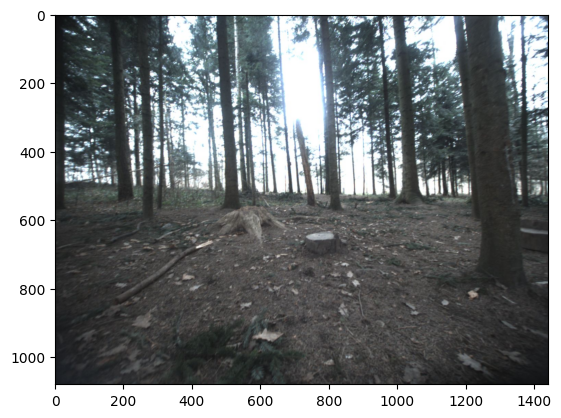

In [2]:
sam = sam_model_registry["vit_h"](checkpoint='checkpoints/sam_vit_h_4b8939.pth').to(device='cuda')
predictor = SamPredictor(sam)
generator = SamAutomaticMaskGenerator(sam)
image = Image.open('hike/wide_angle_camera_front_1677756692_626864514.png')
plt.imshow(image)
masks = generator.generate(np.asarray(image))

In [3]:
type(image)
image.shape

AttributeError: shape

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


In [ ]:
print(len(masks))
big_masks = []
for mask in masks:
    if mask['area'] >= 5000 and mask['area'] <= 500000:
        big_masks.append(mask)

117


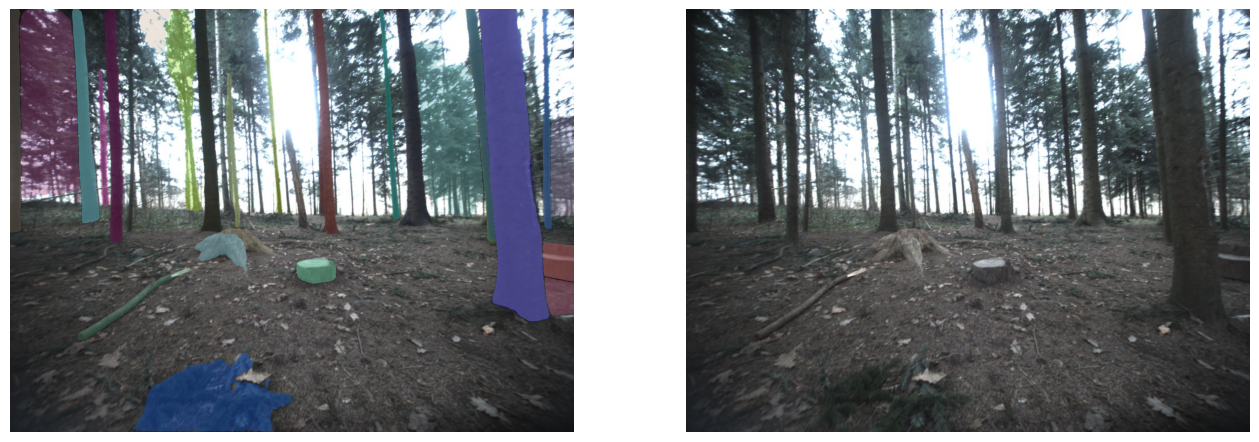

In [ ]:
plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.imshow(image)
show_anns(big_masks)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image)
plt.axis('off')
plt.show() 